**PDL_LAB 9: Image Classification using CNN for CIFAR-10 Data** 

**Name: NAMBIRAJAN R S <BR>Roll NO: 215229125**

```
# This is formatted as code
```



1. Import Libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import matplotlib.pyplot as plt
%matplotlib inline

2. LOAD YOUR DATA AND PRINT THE SHAPE OF TRAINING AND TEST SAMPLES

In [ ]:
(x_train,y_train), (x_test, y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('X_train:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

X_train: (50000, 32, 32, 3)
50000 train samples
10000 test samples


3. Print the shape of one image (IS IT 32* 32 * 3 NUMPY ARRAY?)

In [ ]:
x_train[444].shape

(32, 32, 3)

4. Display one image using imshow() function

[9]


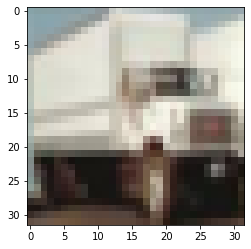

In [ ]:
print(y_train[444])
plt.imshow(x_train[444])

5. Convert y_train and y_test into categorical values

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

6. Convert train data into float and scale

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

7. Build your first CNN

In [ ]:
INPUT_SHAPE = (32,32,3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

9. Compile and fit and validate your model with the following parameters

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0005,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=15,
                  verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
1250/1250 - 38s - loss: 1.7133 - accuracy: 0.3758 - val_loss: 1.4219 - val_accuracy: 0.4950 - 38s/epoch - 30ms/step
Epoch 2/15
1250/1250 - 35s - loss: 1.4178 - accuracy: 0.4920 - val_loss: 1.3129 - val_accuracy: 0.5445 - 35s/epoch - 28ms/step
Epoch 3/15
1250/1250 - 35s - loss: 1.3116 - accuracy: 0.5314 - val_loss: 1.3087 - val_accuracy: 0.5509 - 35s/epoch - 28ms/step
Epoch 4/15
1250/1250 - 38s - loss: 1.2423 - accuracy: 0.5599 - val_loss: 1.1266 - val_accuracy: 0.6107 - 38s/epoch - 30ms/step
Epoch 5/15
1250/1250 - 37s - loss: 1.1958 - accuracy: 0.5766 - val_loss: 1.1269 - val_accuracy: 0.6069 - 37s/epoch - 29ms/step
Epoch 6/15
1250/1250 - 38s - loss: 1.1580 - accuracy: 0.5903 - val_loss: 1.1027 - val_accuracy: 0.6067 - 38s/epoch - 31ms/step
Epoch 7/15
1250/1250 - 37s - loss: 1.1274 - accuracy: 0.6009 - val_loss: 1.0631 - val_accuracy: 0.6249 - 37s/epoch - 30ms/step
Epoch 8/15
1250/1250 - 35s - loss: 1.1038 - accuracy: 0.6151 - val_loss: 1.1612 - val_accuracy: 0.6068 - 35s/ep

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0295120477676392
Test accuracy: 0.6491000056266785


**Part-2 Model Improvements**

1. Build a more complicated model with the following pattern: Conv -> Conv->
MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
2. Use strides of 1 for all convolutional layers.
3. How many parameters does your model have? How does that compare to the
previous model?
4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy
numbers (on both the training and validation sets)?
5. Try different structures and run times, and see how accurate your model can be.

**Model 1**

In [ ]:
INPUT_SHAPE = (32,32,3)
model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))
model1.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                      

In [ ]:
model1.compile(optimizer=RMSprop(lr=0.0005,decay=1e-6),
               loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history1=model1.fit(x_train,y_train,batch_size=32,epochs=5,
                  verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/5
1250/1250 - 556s - loss: 1.4815 - accuracy: 0.4689 - val_loss: 1.2041 - val_accuracy: 0.5730 - 556s/epoch - 445ms/step
Epoch 2/5
1250/1250 - 562s - loss: 1.0357 - accuracy: 0.6356 - val_loss: 1.0118 - val_accuracy: 0.6451 - 562s/epoch - 449ms/step
Epoch 3/5
1250/1250 - 542s - loss: 0.7904 - accuracy: 0.7261 - val_loss: 0.9275 - val_accuracy: 0.6886 - 542s/epoch - 433ms/step
Epoch 4/5
1250/1250 - 544s - loss: 0.5793 - accuracy: 0.8009 - val_loss: 1.0348 - val_accuracy: 0.6767 - 544s/epoch - 435ms/step
Epoch 5/5
1250/1250 - 533s - loss: 0.3971 - accuracy: 0.8652 - val_loss: 1.2270 - val_accuracy: 0.6805 - 533s/epoch - 426ms/step


In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2496305704116821
Test accuracy: 0.6789000034332275


**Model 2**

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same',
                  input_shape=(32,32,3)))
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.3))
model2.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 420s 268ms/step - loss: 1.7100 - accuracy: 0.3583
Epoch 2/10
1563/1563 [==============================] - 411s 263ms/step - loss: 1.3051 - accuracy: 0.5299
Epoch 3/10
1563/1563 [==============================] - 413s 264ms/step - loss: 1.1307 - accuracy: 0.6001
Epoch 4/10
1563/1563 [==============================] - 412s 264ms/step - loss: 1.0251 - accuracy: 0.6408
Epoch 5/10
1563/1563 [==============================] - 422s 270ms/step - loss: 0.9573 - accuracy: 0.6653
Epoch 6/10
1563/1563 [==============================] - 410s 262ms/step - loss: 0.9123 - accuracy: 0.6817
Epoch 7/10
1563/1563 [==============================] - 408s 261ms/step - loss: 0.8760 - accuracy: 0.6949
Epoch 8/10
1563/1563 [==============================] - 415s 265ms/step - loss: 0.8469 - accuracy: 0.7037
Epoch 9/10
1563/1563 [==============================] - 417s 267ms/step - loss: 0.8255 - accuracy: 0.7111
Epoch 10/10
1563/1563 [=======================

In [ ]:
score1 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.7016170620918274
Test accuracy: 0.7584999799728394
